**Goal of this note**:

In this note we review different options of Pandas library for plotting


In [1]:
import pandas as pd
df=pd.read_csv('df.csv')
df

,date,spend,sales,installation
0,2022-01-01,39743.907416,225.0,0.0
1,2022-01-02,39160.917947,199.0,0.0
2,2022-01-03,62458.905967,142.0,0.0
3,2022-01-04,88295.004985,129.0,0.0
4,2022-01-05,99795.161185,182.0,0.0
...,...,...,...,...
238,2022-08-27,394466.777572,1426.0,21691.0
239,2022-08-28,383136.727268,391.0,13339.0
240,2022-08-29,386735.259861,150.0,8058.0
241,2022-08-30,412461.665041,390.0,10337.0


**df discription** :
Above dataframe is the spend in marketing, sales, and new_users of a company within a specific range. (Note that the data is fake)

## Line Plots

### Plot versus index

* The simplest order works on pandas dataframe is plot option: (it plots all columns versus the index)

<AxesSubplot:>

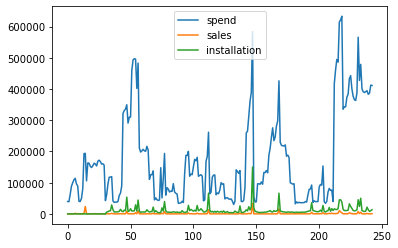

In [2]:
df.plot()

### Plot versus specific columns
We can also plot with respect to specific column. It can be done in two ways:

* make that column an index

* plot an arbitrayry y_column with respect to any x_column:

<AxesSubplot:xlabel='date'>

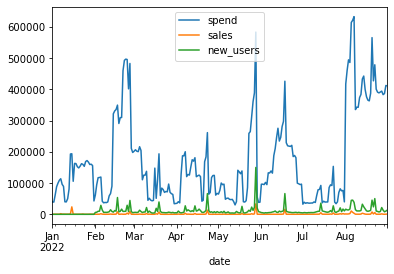

In [3]:
df.set_index('date').plot()

<AxesSubplot:xlabel='date'>

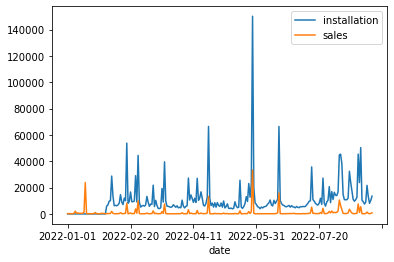

In [3]:
df.plot(x='date',y=['installation','sales'])

### Subplots

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

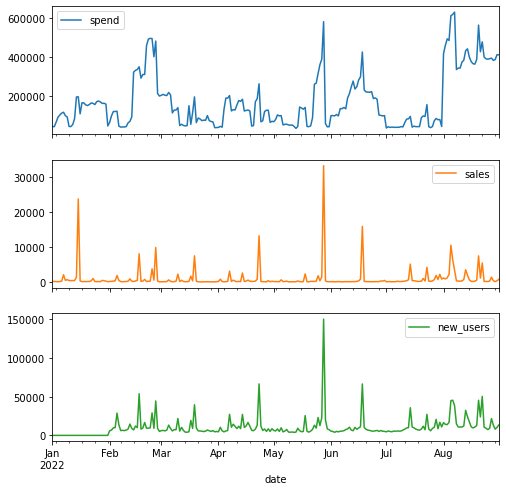

In [5]:
df.plot(x='date',subplots=True,figsize=(8,8))

## Bar plots

Bar plots, instead of ploting a line, they plot a bar at each data point. Hence it is suitable for descrete values where the index is those values.

For example, imagine that we want to categorize the sales into 10 different parts (0 for days we had low sales and 9 for days with high sales). Then we want to know how many days we had for each category.

As I want to plot all columns together and I'm only interested in categories, (not actual values) I scale the data, so the maximum of each column becomes 1.

<AxesSubplot:xlabel='date'>

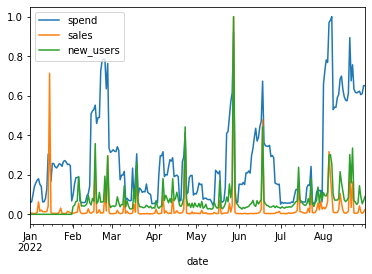

In [6]:
from sklearn.preprocessing import MaxAbsScaler
features=df.drop('date',axis=1).columns.tolist()
scaler=MaxAbsScaler()
df_scaled=pd.DataFrame(index=df.date,columns=features,data=scaler.fit_transform(df[features]))
df_scaled.plot()


<AxesSubplot:xlabel='spend'>

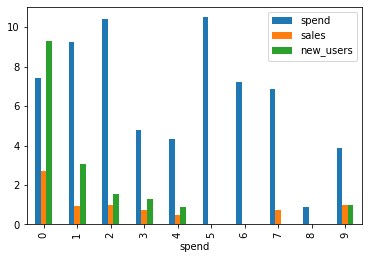

In [12]:
df_cat=pd.DataFrame(columns=df_scaled.columns)
for col in df_cat.columns:
    df_cat[col]=df_scaled[col].groupby(pd.cut(df_scaled[col],bins=10,labels=False)).sum()
df_cat.fillna(0,inplace=True)
df_cat.plot(kind='bar')

**Discription**:

* we first make a new dataframe that has the same columns as df_scale

* then for each col in that dataframe, we fill it by new variables. in each column, we first cut the data into 10 different categories by using **pd.cut**

* Then groupby the scaled data by those categories and sum them. For example sum of all sales belong to the category 0 is 2.7. While we don't have any sale in categories 5,6,8.

<AxesSubplot:xlabel='date'>

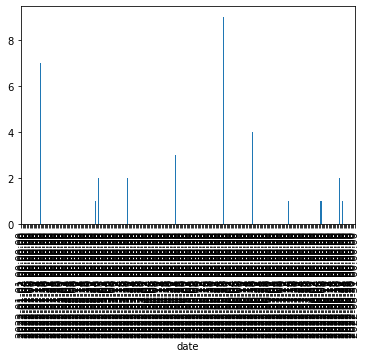

In [10]:
pd.cut(df_scaled['sales'],bins=10,labels=False).plot(kind='bar')

In [8]:
col='sales'
df_scaled[col].groupby(pd.cut(df_scaled[col],bins=10,labels=False)).sum()

sales
0    2.713511
1    0.959638
2    0.991610
3    0.715099
4    0.478381
7    0.713601
9    1.000000
Name: sales, dtype: float64

### Other types of bar plots

<AxesSubplot:xlabel='spend'>

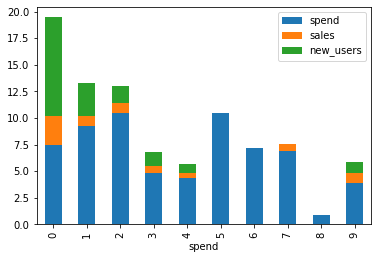

In [14]:
# we can put different columns on each other
df_cat.plot(kind='bar',stacked=True)

<AxesSubplot:ylabel='spend'>

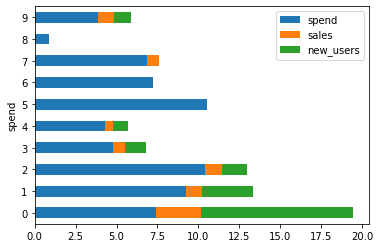

In [15]:
# Or make the plot horizontal
df_cat.plot(kind='barh',stacked=True)

## Histogram Plots

* It is suitable when we are interested in the frequency of data, means how many times we had category 0 of the sales, etc.

<AxesSubplot:ylabel='Frequency'>

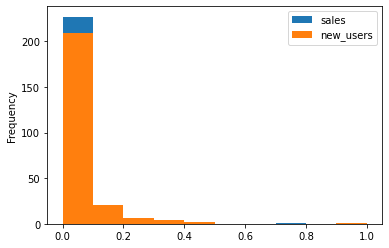

In [18]:
df_scaled.plot(kind='hist',y=['sales','new_users'])

<AxesSubplot:ylabel='Frequency'>

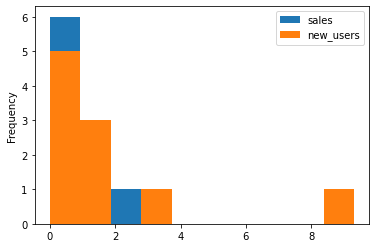

In [19]:
df_cat.plot(kind='hist',y=['sales','new_users'])

We can also work with non-categorized data, but change the bins or put the stacked=True

<AxesSubplot:ylabel='Frequency'>

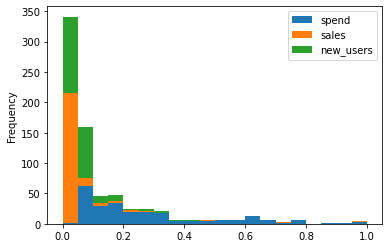

In [20]:
df_scaled.plot(kind='hist',stacked=True,bins=20)

Or change the orientation

<AxesSubplot:xlabel='Frequency'>

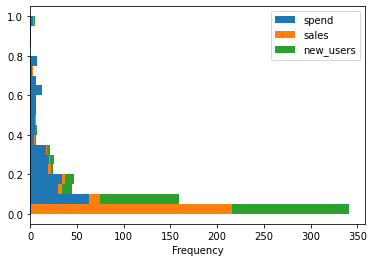

In [21]:
df_scaled.plot(kind='hist',stacked=True,bins=20,orientation='horizontal')

We can plot each column individually

array([[<AxesSubplot:title={'center':'spend'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'new_users'}>, <AxesSubplot:>]],
      dtype=object)

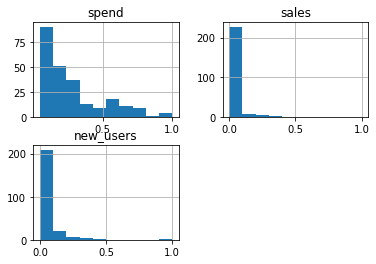

In [26]:
df_scaled.hist()

## Box Plot

This plot shows the statistical measures of each column, including the mean, std, and outliers

<AxesSubplot:>

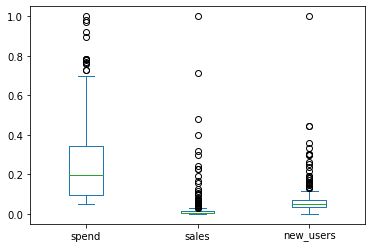

In [27]:
df_scaled.plot(kind='box')

In [28]:
df_scaled.describe()

,spend,sales,new_users
count,243.000000,243.000000,243.000000
mean,0.269999,0.031160,0.070575
std,0.224607,0.096056,0.091688
min,0.047639,0.002038,0.000000
25%,0.096003,0.004360,0.034624
50%,0.194907,0.006652,0.048511
75%,0.345764,0.014922,0.071890
max,1.000000,1.000000,1.000000


## Scatter plot

<AxesSubplot:xlabel='spend', ylabel='sales'>

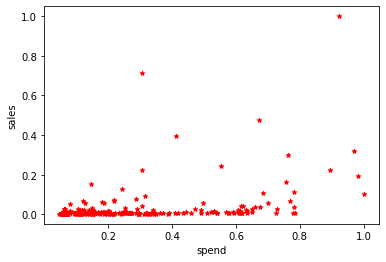

In [35]:
df_scaled.plot(kind='scatter',x='spend',y='sales',marker='*',color='red')


<AxesSubplot:xlabel='spend', ylabel='sales'>

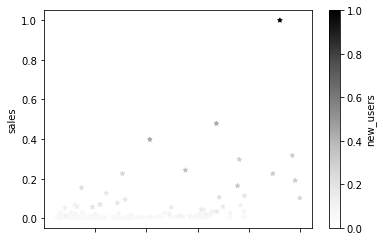

In [37]:
df_scaled.plot(kind='scatter',x='spend',y='sales',c='new_users',marker='*')


## Pie Chart

This works well with Pandas Series, to show share of each part

array([<AxesSubplot:ylabel='spend'>, <AxesSubplot:ylabel='sales'>,
       <AxesSubplot:ylabel='new_users'>], dtype=object)

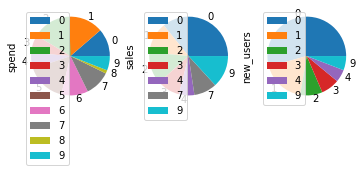

In [40]:
df_cat.plot(kind='pie',subplots=True)

<AxesSubplot:ylabel='sales'>

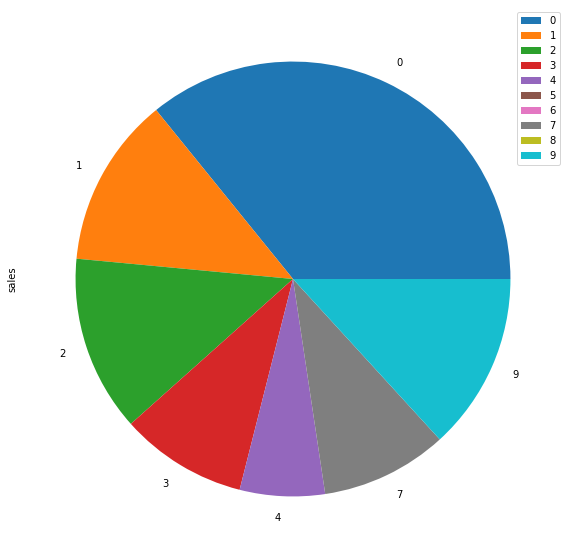

In [42]:
df_cat.plot(kind='pie',y='sales',figsize=(10,10))